In [1]:
import numpy as np
from numpy import identity as I
from sympy import Symbol, init_printing, log, Matrix
from sympy.solvers import solve
init_printing()

## Постановка задачи

Решаем систему уравнений вида 
$$\begin{cases}
f_1(x_1, x_2, ..., x_n) = 0,\\
f_2(x_1, x_2, ..., x_n) = 0,\\
... \\
f_n(x_1, x_2, ..., x_n) = 0.\\
\end{cases}$$
В матричной форме записи: $\mathbf{F}(\mathbf{x})=\boldsymbol{\theta}$

Будем работать со следующим примером: 
$$\begin{cases} x_1^2 - 2\lg{x_2}-1 = 0, \\
                x_1^2 - x_1 x_2 + 1 = 0.
  \end{cases}$$

In [2]:
x1 = Symbol('x_1')
x2 = Symbol('x_2')
tau = Symbol('tau')
X = Matrix([x1, x2])

f1 = x1**2 - 2 * log (x2) - 1
f2 = x1**2 - x1 * x2 + 1
F = Matrix([f1, f2])
J = F.jacobian(X)

### Метод простой итерации (релаксации)

$$\Phi(\mathbf{x}) = \mathbf{x} - \tau \mathbf{F}(\mathbf{x})$$

$$\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} - \tau \mathbf{F}(\mathbf{x}^{(k)})$$

Условие сходимости: 
$$
\newcommand\norm[1]{\left\lVert#1\right\rVert}
\norm{\Phi'(\mathbf{x})} < 1$$



In [5]:
Phi = I(2) - 0.1 * J
Phi.norm()

$$\begin{cases} x_1^2 - 2\lg{x_2}-1 = 0, \\
                x_1^2 - x_1 x_2 + 1 = 0.
  \end{cases}$$

Метод простой итерации, Зейделя, Ньютона, модифицированный Ньютон, Бройден (секущих)

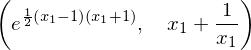

In [47]:
y1 = solve(f1, x2)[0]
y2 = solve(f2, x2)[0]
y1, y2

<IPython.core.display.Javascript object>


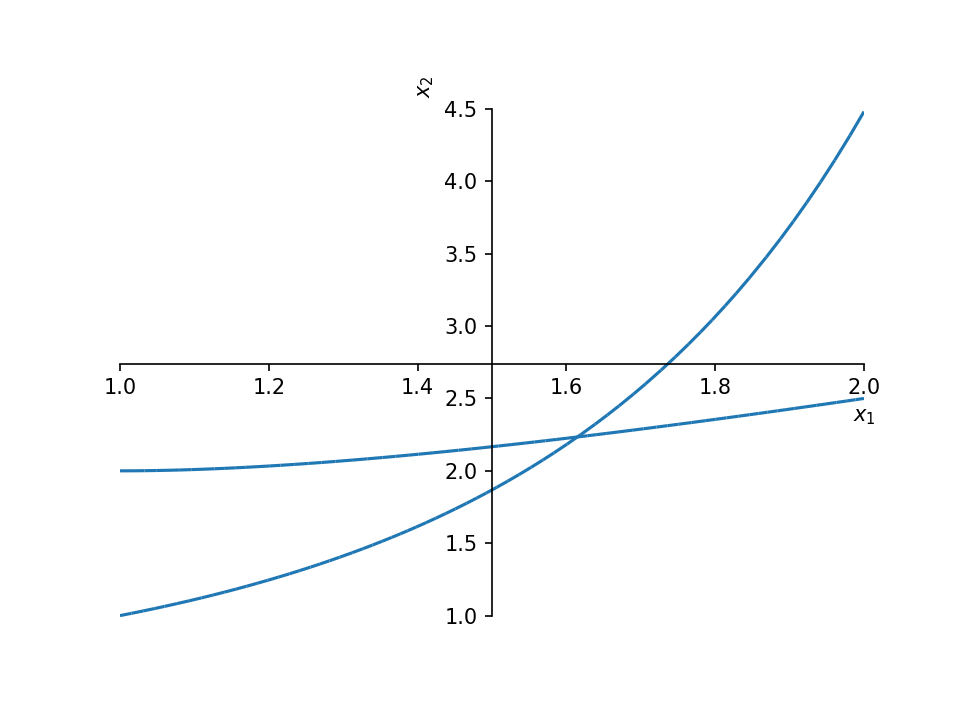

In [48]:
%matplotlib notebook
from sympy import plot
import matplotlib.pyplot as plt
p1 = plot(y1, (x1, 1, 2), show=False, xlabel='$x_1$', ylabel='$x_2$');
p2 = plot(y2, (x1, 1, 2), show=False);

p1.append(p2[0])
p1.show()